In [21]:
import pandas as pd
import numpy as np

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
from palmerpenguins import load_penguins
from sklearn.preprocessing import PolynomialFeatures


# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [26]:
penguins = load_penguins()
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


In [27]:
print("Dummy variables possibility: species, island, sex (Multiple categories)")

Dummy variables possibility: species, island, sex (Multiple categories)


In [28]:
print(penguins.dtypes)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object


In [29]:
categorical_cols = penguins.select_dtypes(include=["object", "category"]).columns.tolist()
print(categorical_cols)

['species', 'island', 'sex']


In [30]:
numeric_cols = penguins.select_dtypes(include=["number"]).columns.tolist()
print(numeric_cols)

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']


In [31]:
penguins_dummy = pd.get_dummies(penguins)
penguins_dummy

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
3,NaN,NaN,NaN,NaN,2007,True,False,False,False,False,True,False,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [32]:
df = penguins[["bill_length_mm", "bill_depth_mm"]].dropna()
X = df[["bill_length_mm"]].values
y = df["bill_depth_mm"].values

In [33]:
# print(f"X={X}")
# print(f"\ny={y}")

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [35]:
degrees = [1, 2, 3, 10]
models = {}
mses = {}

results = []


In [36]:
for d in degrees:
        poly = PolynomialFeatures(degree=d, include_bias=False)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly  = poly.transform(X_test)

        model = LinearRegression().fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)

        models[d] = (model, y_pred)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)


        results.append({
                'Degree': d,
                'R2': r2,
                'MSE': mse,
                'RMSE': rmse
        })

In [37]:
# Combine predictions
print(models)

{1: (LinearRegression(), array([17.07220602, 16.66826057, 16.89353784, 16.73040603, 16.73040603,
       17.14988784, 17.8878651 , 17.65481965, 16.66049239, 17.91116965,
       16.83916057, 16.84692875, 17.23533784, 17.73250147, 17.47615147,
       16.71486966, 17.57713783, 17.29748329, 17.13435148, 16.75371057,
       16.89353784, 17.06443784, 17.66258783, 17.93447419, 17.53052874,
       17.49168783, 16.82362421, 17.06443784, 17.76357419, 17.37516511,
       16.96345148, 16.97121966, 16.96345148, 17.42954238, 17.73250147,
       17.14211966, 17.01782875, 17.27417875, 17.82571965, 17.27417875,
       17.57713783, 17.81018328, 17.11104693, 16.37306967, 17.29748329,
       17.04113329, 17.11881511, 16.8702333 , 17.62374692, 16.59834694,
       17.27417875, 17.1654242 , 17.7169651 , 17.62374692, 16.55173785,
       17.65481965, 17.70919692, 17.14988784, 17.72473329, 17.46061511,
       16.73040603, 17.42954238, 17.35186056, 17.34409238, 17.04890148,
       17.09551057, 17.0799742 , 17.577

In [38]:
print(results)

[{'Degree': 1, 'R2': 0.03780204621893435, 'MSE': 4.117807844168075, 'RMSE': np.float64(2.029238242338261)}, {'Degree': 2, 'R2': 0.1221390000407091, 'MSE': 3.7568806891727275, 'RMSE': np.float64(1.938267445213051)}, {'Degree': 3, 'R2': 0.13249516455720234, 'MSE': 3.712560603774568, 'RMSE': np.float64(1.9268006133937596)}, {'Degree': 10, 'R2': 0.23826536920212948, 'MSE': 3.259908031967868, 'RMSE': np.float64(1.8055215401561588)}]


In [39]:
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_minimal
# Combine test set and predictions into one dataframe
plot_df_list = []
for d in degrees:
    plot_df = pd.DataFrame({
        'bill_length_mm': X_test.flatten(),
        'Actual': y_test,
        'Predicted': models[d][1],
        'Degree': f'{d}'
    })
    plot_df_list.append(plot_df)

plot_df = pd.concat(plot_df_list, ignore_index=True)

# --- Plot with plotnine ---
p = (
    ggplot(plot_df, aes(x='bill_length_mm', y='Actual')) +
    geom_point(color='gray', alpha=0.6) +
    geom_line(aes(y='Predicted', color='Degree'), size=1) +
    labs(
        title='Polynomial Regression Predictions (Test Set)',
        x='Bill length (mm)',
        y='Bill depth (mm)',
        color='Model Degree'
    )
)

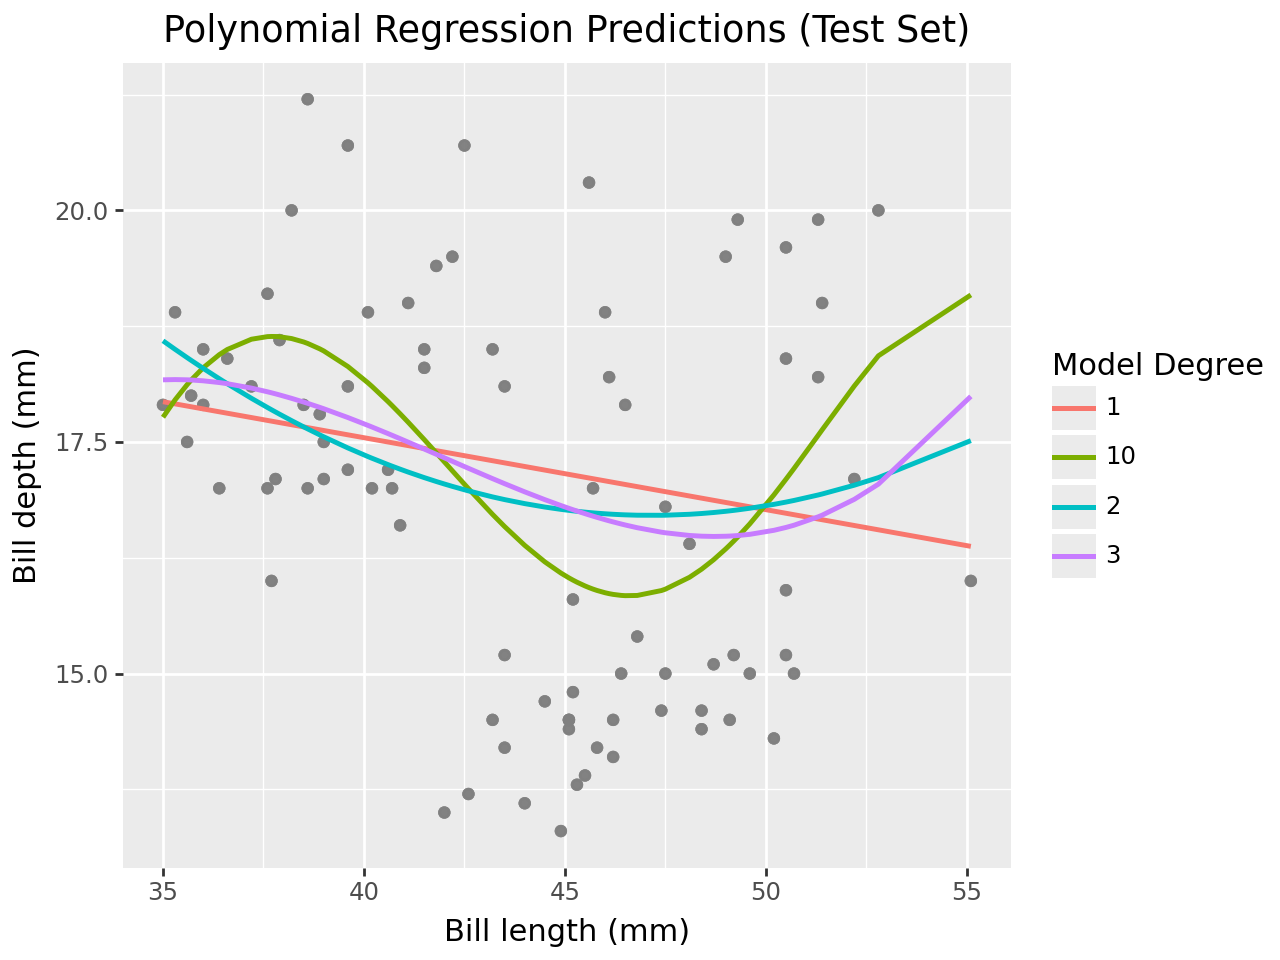

In [40]:
p.show()

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?